<a href="https://colab.research.google.com/github/anjaleeDS/Sandbox/blob/master/spacy_ner_BayesHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# NER Libraries
import spacy
from spacy import displacy
import pandas as pd
import altair as alt

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [14]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive
%cd My\ Drive/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive


In [15]:
myfile = 'HistoryBayes.txt'
f = open(myfile, "rb")
text_read = f.read().decode(errors='replace')
# text_read = text.encode('ascii',errors='ignore')
text = str(text_read)
text = text.replace('\t','')
text = text.replace('\n','')
text = text.replace('\r','')

In [16]:
#close file for good practice
f.close()

In [ ]:
# print((text))
!python -m spacy download en_core_web_lg

# STOP AND RESTART RUNTIME


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [17]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)


In [ ]:
list_text = []
list_ent = []

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    list_text.append(ent.text)
    list_ent.append(ent.label_)


In [19]:
text_df = pd.DataFrame(list_text, columns=['text'])
text_df['ent'] = list_ent
text_df['cat'] = text_df.text+text_df.ent

text_df

,text,ent,cat
0,Bayes,ORG,BayesORG
1,the 1740s,DATE,the 1740sDATE
2,Thomas Bayes,PERSON,Thomas BayesPERSON
3,Bayes,ORG,BayesORG
4,the twentieth century,DATE,the twentieth centuryDATE
...,...,...,...
452,Bayesians,ORG,BayesiansORG
453,BUGS,ORG,BUGSORG
454,Bayesian,PERSON,BayesianPERSON
455,Bayes',ORG,Bayes'ORG


In [ ]:
!pip install squarify

[]

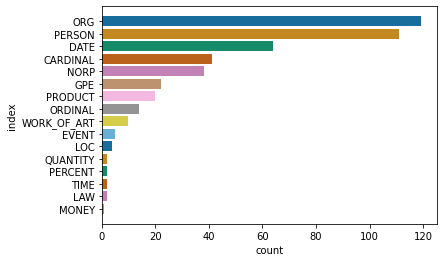

In [20]:
#interested in the top N entities involved
def top_ents(entity, data_df, num):
  type_df = data_df[data_df.ent==entity]
  return(type_df.text.value_counts().head(num))

#what are the entities available?
devilpie = text_df.ent.value_counts()
devilpie = devilpie.to_frame(name='count').reset_index()

#let's just take the top 20
lilpie = devilpie[0:20]

#libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Reds")

ax = sns.barplot(data = lilpie, y='index', x='count',palette="colorblind")
# ax.set(xlabel="Entity Type")

plt.plot()

In [24]:
#use the custom function and graph it!
temp = top_ents('ORG', text_df, 10)

#make into df for graphing
temp_df = temp.to_frame(name='count').reset_index()

bars = alt.Chart(temp_df).mark_bar().encode(
    x='count:Q',
    y=alt.Y('index:N', sort='x'),
    tooltip=('index:N', 'count:Q')
).interactive()

bars.properties(height=900)

alt.Chart(...)

In [ ]:
#graph it ALL
bars = alt.Chart(text_df).mark_bar().encode(
    x='count(ent):Q',
    y=alt.Y('text:N', sort='x'),
    tooltip=('ent:N', 'count(ent):Q')
).interactive()


text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='ent:Q'
)

bars.properties(height=900)

alt.Chart(...)